In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

## Part 1: Build a classification model using text data

### click-bait dataset 

In [ ]:
#pip install aimodelshare

In [ ]:
pip freeze | grep -i 'dill'

In [ ]:
pip install dill==0.2.7.1

In [2]:
import aimodelshare as ai

In [12]:
X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [6]:
print("type of text_train: {}".format(type(X_train)))
print("length of text_train: {}".format(len(X_train)))
print("text_train[6]:\n{}".format(X_train[6]))

type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 24979
text_train[6]:
Scientology ties at New Village Leadership Academy stir controversy for Will Smith and Jada Pinkett-Smith


In [10]:
X_train.head(10)

0       MyBook Disk Drive Handles Lots of Easy Backups
1                       CIT Posts Eighth Loss in a Row
2    Candy Carson Singing The "National Anthem" Is ...
3    Why You Need To Stop What You're Doing And Dat...
4    27 Times Adele Proved She's Actually The Reale...
5    29 Times #BlackGirlMagic Was More Than Just A ...
6    Scientology ties at New Village Leadership Aca...
7               Judge Allows Asbestos Case to Continue
8              Cities Deal With a Surge in Shantytowns
9                15 Reasons December Is The Best Month
Name: headline, dtype: object

In [11]:
y_train_labels.head(10)

13620    not clickbait
15394    not clickbait
2796         clickbait
1673         clickbait
13020        clickbait
8961         clickbait
3152     not clickbait
6631     not clickbait
3892     not clickbait
14778        clickbait
Name: label, dtype: object

In [12]:
print(X_train.shape)
print(y_train_labels.shape)

(24979,)
(24979,)


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Build vocabulary from training text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# preprocessor tokenizes words and makes sure all documents have the same length
def preprocessor(data, maxlen=40, max_words=10000):

    sequences = tokenizer.texts_to_sequences(data)

    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=maxlen)

    return X

print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(24979, 40)
(6245, 40)


In [16]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

ValueError: Found input variables with inconsistent numbers of samples: [24979, 112]

### Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

### Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [18]:
ai.download_data("public.ecr.aws/y2e2a1d6/clickbait_competition_data-repository:latest")


Xdata=pd.read_csv("clickbait_competition_data/X_train.csv")
ydata=pd.read_csv("clickbait_competition_data/y_train.csv")


# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xdata.loc[:,"headline"],ydata.loc[:,"label"],random_state=42)

X=Xdata.loc[:,"headline"]
y=ydata.loc[:,"label"]

print(X_train.shape)
print(y_train.shape)


Data downloaded successfully.
(18734,)
(18734,)


In [19]:
count = CountVectorizer()
bag = count.fit_transform(X)
print(bag.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(bag, y, random_state=42)

In [21]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.97


In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.97
Best parameters:  {'C': 10}


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.97


In [22]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")




In [26]:
vect = CountVectorizer(ngram_range=(1,1)).fit(X_train)
Xv_train = vect.transform(X_train)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(Xv_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

AttributeError: lower not found

In [37]:
vect = CountVectorizer(ngram_range=(1,1)).fit(X_train)
Xb = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xb, y, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.97
Best parameters:
{'C': 10}


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


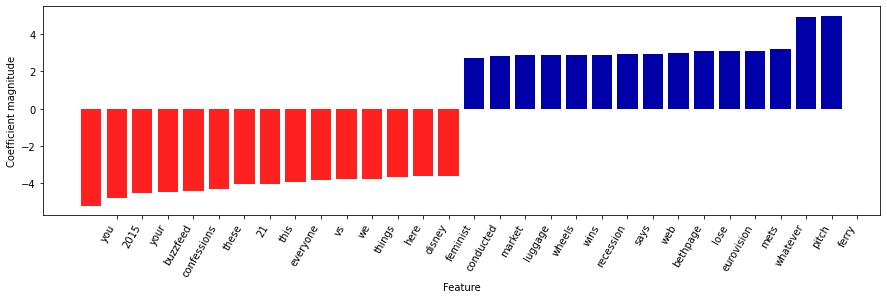

In [40]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=10).fit(X_train,y_train).coef_
feature_names = count.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

In [41]:
vect = CountVectorizer(ngram_range=(2,2)).fit(X)
Xb = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xb, y, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.91
Best parameters:
{'C': 100}


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=100).fit(X_train,y_train).coef_
feature_names = count.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=15)

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Number of coefficients 115618 doesn't match number offeature names 20332.

In [44]:
vect = CountVectorizer(ngram_range=(1,3)).fit(X)
Xb = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xb, y, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best cross-validation score: 0.97
Best parameters:
{'C': 100}


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=100).fit(X_train,y_train).coef_
feature_names = count.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Number of coefficients 281365 doesn't match number offeature names 20332.

## Part 2: Build a predictive neural network using Keras

#### Setting up the libraries and data 

In [3]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

In [4]:
model = Sequential()

In [5]:
df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv", delimiter=",")
df.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [49]:
df.shape

(150, 6)

In [6]:
df = df.iloc[:,1:]
y = df['Species']
X = df.loc[:, df.columns != 'Species']

display(pd.get_dummies(y))
display(df.head())
display(X.head())
display(y[0::10])

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: Species, dtype: object

In [51]:
X.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [52]:
X.shape

(150, 4)

In [53]:
y.head(10)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: Species, dtype: object

### Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Include code for selecting the number of hidden units using GridSearchCV and evaluation on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

In [9]:
def create_model(hiddennodes=1):
	# create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) # epochs arg is built in to Scikit learn's... 
                                                                      # KerasClassifier

# Building a simple search grid that adjusts epochs
param_grid = dict(hiddennodes=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.689286 using {'hiddennodes': 20}


In [10]:
def create_model(hiddennodes=1):
	# create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) # epochs arg is built in to Scikit learn's... 
                                                                      # KerasClassifier

# Building a simple search grid that adjusts epochs
param_grid = dict(hiddennodes=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_test, y_test)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.800000 using {'hiddennodes': 10}


I have first train-split the dataset. In both of my models I wanted to predict the hidden units for the first hidden layer with GridSearch CV. In my first model, the number od hidden units of the second layer was 10, in the second model it was 8. After setting up the model, and the compile, GridSearch Cv preditcted a 20 hiddennodes for the first model and 10 for the second model. With these hidden nodes, my first model prediction accuracy is 0.689 and my second's is 0.8. From this results I can say that the second model's accuracy is signifcantly better than the first model's, there for I would choose the second model to evalute the dataset.

In [11]:
model = Sequential() 
model.add(Dense(units=30, activation='relu', input_dim=4))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train)
score = model.evaluate(X_test, y_test, epochs=100, verbose=0) # extract loss and accuracy from test data evaluation
print(score)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 30)                150       
_________________________________________________________________
dense_97 (Dense)             (None, 8)                 248       
_________________________________________________________________
dense_98 (Dense)             (None, 3)                 27        
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


ValueError: in user code:

    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
pd.get_dummies(y).columns

In [ ]:
model = Sequential([
    Dense(10, input_shape=(4,)),  #we dont set up the input layer separetly, it is imbedded 
    Activation('relu'),    ##how many feuters #relu is an acotivation performance 
    Dense(8),       ##maximum value 0 to the max - no zero if it is negative its 0
    Activation('relu'),
    Dense(2),
    Activation('softmax'), #multiple catgories if it more , if it is a regression just delete it
])

model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


model.fit(X_train, y_train,epochs=100)